# Lab 1: Identification of Damping Using Log Decrement

In [1]:
%load_ext autoreload
%autoreload 2
import vibration_toolbox as vtb
from vibration_toolbox import time_plot
import matplotlib.pyplot as plt
import numpy as np
import scipy.io as sio
import math as math

Interactive iPython tools will not work without IPython.display           and ipywidgets installed.
Interactive iPython tools will not work without IPython.display           and ipywidgets installed.


Beam Properties
---------------------

In [2]:
l=21.75*0.0254;# length in meters
h=0.5*0.0254;# height in meters
w=1*0.0254;# width in meters
rho=2700;# density in kg/cubicmeter
E=7.31e10;# youngs modulus in Pa
I = (1/12)*w*h**3; # moment of inertia (m^4)
k = (3*E*I)/l**3; # stiffness (N/m)
V = l*w*h;# volume (m^3)
m = rho*V;# mass (kg)
wn = math.sqrt(k/m) # analytical natural frequency of massless beam with concentrated mass
wn2=(1.875)**(2)*math.sqrt((E*I)/(m*(l)**3)) #natural freqency of a uniform section beam
#c_cr = 2*math.sqrt(k*m); # critical damping coefficient

In [3]:
wn

108.259140771331

In [4]:
wn2

219.7386705465195

Acceleration vs Time plot
------------------------------------

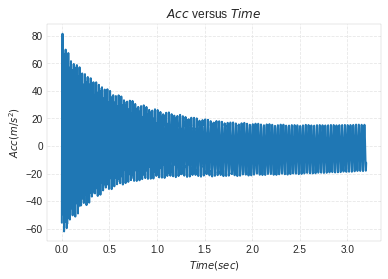

In [5]:
# Acc vs Time

%matplotlib inline
mat_contents=sio.loadmat('Case1-2.mat')
Time_domain = mat_contents['Time_domain']
Time_chan_2 = mat_contents['Time_chan_2']
Time_chan_2 = Time_chan_2*(9.81);
mean=sum(Time_chan_2)/np.size(Time_chan_2);
Accel = Time_chan_2-mean;
# The acceleration values from Bobcat will be in Gs. So,  to convert them to m/s^2,
# we will have to multiply the vector by 9.81
plt.plot(Time_domain, Accel)
plt.grid(True)
plt.ylabel('$Acc(m/s^2)$')
plt.xlabel('$Time(sec)$')
plt.title('$Acc$ versus $Time$')

 Data Analysis
 --------------------

In [6]:
# Enter values from plots for calculations. Use data cursor to
# obtain x and t values.
x1 = 81.45;
t1 = 0.007031;
x2 = 15.44;
t2 = 3.181;
n = 106;
time = t2-t1;


Log Decrement Method
--------------------------

In [7]:
d = (1/n)*math.log(x1/x2) # delta
d

0.015688941419353057

In [8]:
z= d/np.sqrt(4*math.pi**2+d**2) # zeta
z

0.0024969647946533331

In [9]:
Td = (time/n)#damped time period
Td

0.029943103773584907

In [10]:
wd = 2*math.pi/Td #damped natural frequency
wd

209.83747559003763

In [11]:
wne = wd/np.sqrt(1-z**2) # natural frequency in rad/sec
wne

209.83812974392472

In [12]:
k2=(wne**2)*m # one way to use experimental zeta and nat freq to calculate C
k2

21186.684200875719

In [13]:
c_cr = 2*np.sqrt(k2*m) # critical


In [14]:
c=c_cr*z # damping constant
c

0.50422108345689065

In [15]:
x = Accel*(1/-(wd**2))
x[0]

array([ 0.00126369], dtype=float32)

Using Vibration toolbox for comparison
------------------------------------------------------

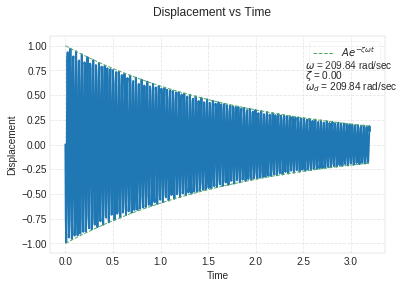

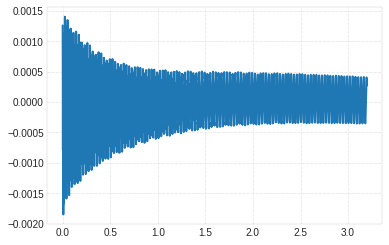

In [30]:
%matplotlib inline
mat_contents=sio.loadmat('Case1-2.mat')
Time_domain = mat_contents['Time_domain']
Time_chan_2 = mat_contents['Time_chan_2']
Time_chan_2 = Time_chan_2*(9.81);
mean=sum(Time_chan_2)/np.size(Time_chan_2);
Accel = Time_chan_2-mean;
ax=max(x);
x = Accel*(1/-(wd**2))# max amplitude
initialvel=-ax*wne;
plt.figure()
vtb.time_plot(m=rho*V, c=c_cr*z, k=(wne**2)*m, x0=0.00126369, v0=-ax*wne, max_time=3.2)
#ax=fig.add_subplot(111)
plt.plot(Time_domain, x)
#grid minor
#plt.title('Case 2: position vs time')
#plt.xlabel('t(s)')
#plt.ylabel('Position (m)')
#plt.legend('Estimated Displacement','Experimental Displacement')
#x[0]

In [25]:
[t,x,v,zeta,omega,omega_d,A]=vtb.free_response(m=rho*V, c=c_cr*z, k=(wne**2)*m, x0=0.00126369, v0=-ax*wne, max_time=3.2);


In [26]:
zeta

0.0024969647946533327

In [27]:
omega

209.83812974392472

In [28]:
omega_d

209.83747559003763

3 Mode shapes
---------------------

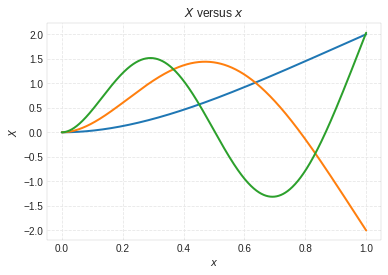

In [29]:
# first three mode shapes
%matplotlib inline
beta = np.array([1.87510407, 4.69409113, 7.85475744])
alpha = np.array([0.7341, 1.0185, 0.9992])
x = np.linspace(0, 1, num=1000)
for i in range(0, 3):
    X=np.cosh(beta[i]*x)-np.cos(beta[i]*x)-alpha[i]*(np.sinh(beta[i]*x)-np.sin(beta[i]*x))
    plt.plot(x, X)
    plt.grid(True)
    plt.ylabel('$X$')
    plt.xlabel('$x$')
    plt.title('$X$ versus $x$')
